In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from init import readFile, split_dataset, error, reduce, CLASSES, FEATURES, plot_confusion_matrix
from k_nearest_neighbours import KNearestNeighbours, Algo

[3]
[2, 1]
[2, 3, 1, 0]
[2, 2, 3, 2, 3, 0, 1, 4]
[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2]), array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3]), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3,

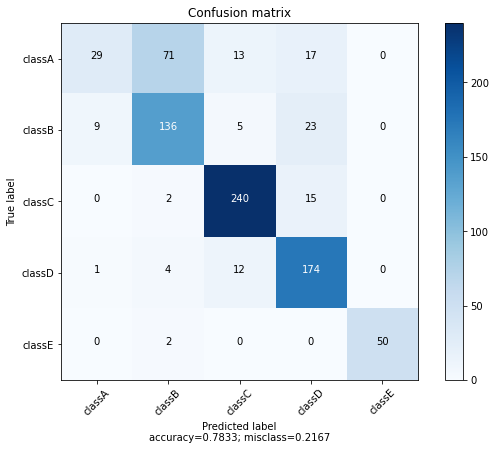

In [8]:
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
x_train, y_train = readFile('data/data.csv', CLASSES)

x_test, y_test = readFile('data/preTest.csv', CLASSES)

knn = KNearestNeighbours.fit(x_train, y_train, 9, algo = Algo.KD_TREE, leaf_size = 30)
print(knn.tree)
x_test_predict = knn.predict(x_test)
cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))
plot_confusion_matrix(cf_mat, CLASSES)

In [6]:
leaf_size = 40
k_values = np.arange(1, leaf_size, 1, int)
errors = np.zeros(len(k_values))
for i in range(len(k_values)):
    knn = KNearestNeighbours.fit(x_train, y_train, k_values[i], algo=Algo.BRUTE, leaf_size=leaf_size)
    y_pred = knn.predict(x_test)
    errors[i] += error(y_test, y_pred)

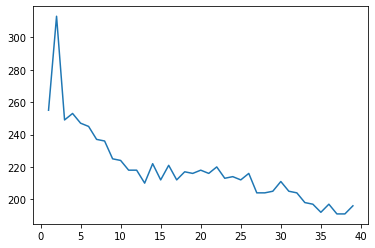

In [7]:
plt.plot(k_values, errors)

In [4]:
leaf_max_size = 40
error_mat = np.zeros((40, 40))
for leaf_size in range(2, leaf_max_size):
    for k in range(1, leaf_size):
        knn = KNearestNeighbours.fit(x_train, y_train, k, algo=Algo.KD_TREE, leaf_size=leaf_size)
        y_pred = knn.predict(x_test)
        error_mat[leaf_size, k] = error(y_test, y_pred)